In [ ]:
# Install necessary Python libraries
!pip install rpy2==3.4.5 pandas==1.3.3

# Install STM in R
import rpy2.robjects as ro
ro.r('''
if (!requireNamespace("stm", quietly = TRUE)) {
  install.packages("stm", repos = "http://cran.us.r-project.org")
}
''')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 13.7 MB/s eta 0:00:00
  Created wheel for rpy2: filename=rpy2-3.4.5-cp310-cp310-linux_x86_64.whl size=299865 sha256=213f165fbcbcef9a9e1670fd81bb95707807f20bbe4d85e5f3cd0175dc65e737
  Stored in directory: /root/.cache/pip/wheels/ba/d8/8b/68fc240578a71188d0ca04b6fe8a58053fbcbcfbe2a3cbad12
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.20.0 requires pandas>=1.5.0, 

(as ‘lib’ is unspecified)




















































































	‘/tmp/RtmpGPPez3/downloaded_packages’



<rpy2.rinterface_lib.sexp.NULLType object at 0x7b45eef0fa00> [RTYPES.NILSXP]

In [ ]:
import pandas as pd

# Replace 'file_path.csv' with the actual path to your CSV file
reviews_data = pd.read_csv('/content/clean_women_clothes_reviews.csv')
print(reviews_data.dtypes)


Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
Clean Text                 object
Token Text                 object
POS Tagged                 object
Final Text                 object
Word Count                  int64
dtype: object


In [ ]:
# Check column types
print(reviews_data.dtypes)

# Replace NaN values with empty strings or an appropriate default
reviews_data = reviews_data.fillna("")

# Convert all columns to consistent types where needed
reviews_data['Review Text'] = reviews_data['Review Text'].astype(str)
reviews_data['Rating'] = pd.to_numeric(reviews_data['Rating'], errors='coerce')  # Ensure 'Rating' is numeric

# Display the updated DataFrame
print(reviews_data.head())


Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
Clean Text                 object
Token Text                 object
POS Tagged                 object
Final Text                 object
Word Count                  int64
dtype: object
   Clothing ID  Age                    Title  \
0          767   33                            
1         1080   34                            
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's

In [ ]:
# Convert pandas DataFrame to R
ro.globalenv['reviews_data'] = pandas2ri.py2rpy(reviews_data)


NameError: name 'pandas2ri' is not defined

In [ ]:
# Check column data types
print(reviews_data.dtypes)

# Preview the dataset to identify problematic columns
print(reviews_data.head())


Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
Clean Text                 object
Token Text                 object
POS Tagged                 object
Final Text                 object
Word Count                  int64
dtype: object
   Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's

In [ ]:
# Replace NaN with an empty string in text columns
reviews_data['Review Text'] = reviews_data['Review Text'].fillna("").astype(str)


In [ ]:
# Convert 'Rating' column to numeric
reviews_data['Rating'] = pd.to_numeric(reviews_data['Rating'], errors='coerce')

# Fill NaN in numeric columns with a default value (e.g., 0)
reviews_data['Rating'] = reviews_data['Rating'].fillna(0)


In [ ]:
print(reviews_data.dtypes)


Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
Clean Text                 object
Token Text                 object
POS Tagged                 object
Final Text                 object
Word Count                  int64
dtype: object


In [ ]:
import pandas as pd
from rpy2.robjects import pandas2ri

# Activate pandas to R conversion
pandas2ri.activate()

# Load dataset
data_path = "/content/clean_women_clothes_reviews.csv"  # Adjust path if necessary
reviews_data = pd.read_csv(data_path)

# Display the first few rows for verification
print(reviews_data.head())

# Send dataset to R
import rpy2.robjects as ro
ro.globalenv['reviews_data'] = pandas2ri.py2rpy(reviews_data)

   Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2    

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:59: UserWarning: Error while trying to convert the column "Title". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>).
  warnings.warn('Error while trying to convert '


AttributeError: 'float' object has no attribute 'encode'

New

In [ ]:
# Fill NaN with empty strings in all object columns
reviews_data = reviews_data.fillna("")

# Ensure all object columns are explicitly strings
for col in reviews_data.select_dtypes(include=['object']).columns:
    reviews_data[col] = reviews_data[col].astype(str)


In [ ]:
# Check for any null values
print(reviews_data.isnull().sum())

# Preview cleaned data
print(reviews_data.head())


Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Clean Text                 0
Token Text                 0
POS Tagged                 0
Final Text                 0
Word Count                 0
dtype: int64
   Clothing ID  Age                    Title  \
0          767   33                            
1         1080   34                            
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high h

In [ ]:
%load_ext rpy2.ipython


In [ ]:
!pip install rpy2==3.4.5


In [ ]:
!sudo apt-get update
!sudo apt-get install -y r-base


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,515 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,621 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454

In [ ]:
!R --version



R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under the terms of the
GNU General Public License versions 2 or 3.
For more information about these matters see
https://www.gnu.org/licenses/.



In [ ]:
%%R
# Example R code
print("R is working!")


[1] "R is working!"


In [ ]:
from rpy2.robjects import pandas2ri, r
import rpy2.robjects as ro

# Activate pandas2ri for pandas-R conversion
pandas2ri.activate()

# Transfer reviews_data to R environment
ro.globalenv['reviews_data'] = pandas2ri.py2rpy(reviews_data)

# Confirm transfer in R
r('print(head(reviews_data))')


  Clothing ID Age                   Title
0         767  33                        
1        1080  34                        
2        1077  60 Some major design flaws
3        1049  50        My favorite buy!
4         847  47        Flattering shirt
5        1080  49 Not for the very petite
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Review Text
0                                                                                                                                                                                                          

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean Text,Token Text,POS Tagged,Final Text,Word Count
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful - silky and sexy and comf...,"['absolutely', 'wonderful', 'silky', 'sexy', '...","[('absolutely', 'RB'), ('wonderful', 'JJ'), ('...",absolutely wonderful silky sexy comfortable,5
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love this dress! it's sooo pretty. i happened ...,"['love', 'dress', 'sooo', 'pretty', 'happened'...","[('love', 'VB'), ('dress', 'NN'), ('sooo', 'NN...",love dress sooo pretty happen find store i'm g...,31
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i had such high hopes for this dress and reall...,"['high', 'hopes', 'dress', 'really', 'wanted',...","[('high', 'JJ'), ('hopes', 'NNS'), ('dress', '...",high hope dress really wanted work initially o...,48
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"i love, love, love this jumpsuit. it's fun, fl...","['love', 'love', 'love', 'jumpsuit', 'fun', 'f...","[('love', 'VB'), ('love', 'NN'), ('love', 'NN'...",love love love jumpsuit fun flirty fabulous ev...,14
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...,"['shirt', 'flattering', 'due', 'adjustable', '...","[('shirt', 'NN'), ('flattering', 'VBG'), ('due...",shirt flatter due adjustable front tie perfect...,16
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"i love tracy reese dresses, but this one is no...","['love', 'tracy', 'reese', 'dresses', 'one', '...","[('love', 'VB'), ('tracy', 'NN'), ('reese', 'J...",love tracy reese dress one petite foot tall us...,40


New predicting

In [ ]:
r('install.packages("tm")')          # Install the tm package
r('install.packages("SnowballC")')   # Install the SnowballC package (for stemming)


(as ‘lib’ is unspecified)



















	‘/tmp/RtmpGPPez3/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpGPPez3/downloaded_packages’



<rpy2.rinterface_lib.sexp.NULLType object at 0x7b45eef0fa00> [RTYPES.NILSXP]

In [ ]:
r('library(tm)')         # Load the tm package
r('library(SnowballC)')  # Load the SnowballC package


'SnowballC','tm','NLP',...,'datasets','methods','base'


In [ ]:
# Install the stm package
from rpy2.robjects.packages import importr
utils = importr('utils')
utils.install_packages('stm')


(as ‘lib’ is unspecified)







	‘/tmp/RtmpGPPez3/downloaded_packages’



<rpy2.rinterface_lib.sexp.NULLType object at 0x7b45eef0fa00> [RTYPES.NILSXP]

In [ ]:
from rpy2.robjects import r

# Load the stm package
r('library(stm)')


 Papers, resources, and other materials at structuraltopicmodel.com



'stm','SnowballC','tm',...,'datasets','methods','base'


In [ ]:
from rpy2.robjects import pandas2ri, r
import rpy2.robjects as ro

# Activate pandas2ri for pandas-R conversion
pandas2ri.activate()

# Transfer reviews_data to R environment
ro.globalenv['reviews_data'] = pandas2ri.py2rpy(reviews_data)

# Install and load required R packages
r('install.packages("tm")')
r('install.packages("SnowballC")')
r('library(tm)')
r('library(SnowballC)')

# Preprocess the data (tokenize the text and clean it)
r('processed <- textProcessor(reviews_data$`Review Text`, metadata = reviews_data)')
r('out <- prepDocuments(processed$documents, processed$vocab, processed$meta)')

# Fit STM model on the processed text data
r('model <- stm(out$documents, out$vocab, K = 5, prevalence = ~ Rating, data = out$meta)')

# Now, let's get the top words for each topic based on the STM model
r('top_words <- labelTopics(model, n = 10)')  # Get the top 10 words for each topic
r('print(top_words)')


(as ‘lib’ is unspecified)







	‘/tmp/RtmpGPPez3/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpGPPez3/downloaded_packages’



Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
Removing 7831 of 13828 terms (7831 of 577985 tokens) due to frequency 
Your corpus now has 22641 documents, 5997 terms and 570154 tokens.Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	.....
	 Recovering initialization...
 	...........................................................
Initialization complete.
....................................................................................................
Completed E-Step (7 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -6.672) 
....................................................................................................
Completed E-Step (6 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -6.537, relative change = 2.023e-02) 
.............................................

<rpy2.rinterface_lib.sexp.NULLType object at 0x7b45eef0fa00> [RTYPES.NILSXP]

In [ ]:
from rpy2.robjects import pandas2ri, r
import rpy2.robjects as ro

# Activate pandas2ri for pandas-R conversion
pandas2ri.activate()

# Transfer reviews_data to R environment
ro.globalenv['reviews_data'] = pandas2ri.py2rpy(reviews_data)

# Install and load required R packages
r('if (!require("stm")) install.packages("stm", dependencies = TRUE)')
r('if (!require("tm")) install.packages("tm", dependencies = TRUE)')
r('if (!require("SnowballC")) install.packages("SnowballC", dependencies = TRUE)')
r('library(stm)')
r('library(tm)')
r('library(SnowballC)')

# Preprocess the data
r('processed <- textProcessor(reviews_data$`Review Text`, metadata = reviews_data)')
r('out <- prepDocuments(processed$documents, processed$vocab, processed$meta)')

# Fit STM model
r('model <- stm(out$documents, out$vocab, K = 5, prevalence = ~ Rating, data = out$meta)')

# Extract top words for each topic
r('top_words <- labelTopics(model, n = 10)')
top_words = r('top_words')

# Print the top words for each topic
print("Top words for each topic:")
print(top_words)

# Predict topic proportions
r('topic_props <- estimateEffect(1:5 ~ Rating, model, meta = out$meta)')


Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
Removing 7831 of 13828 terms (7831 of 577985 tokens) due to frequency 
Your corpus now has 22641 documents, 5997 terms and 570154 tokens.Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	.....
	 Recovering initialization...
 	...........................................................
Initialization complete.
....................................................................................................
Completed E-Step (6 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -6.672) 
....................................................................................................
Completed E-Step (7 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -6.537, relative change = 2.023e-02) 
.............................................

  no applicable method for 'predict' applied to an object of class "STM"



RRuntimeError: Error in UseMethod("predict") : 
  no applicable method for 'predict' applied to an object of class "STM"


In [ ]:
# Extract topic proportions
r('topic_proportions <- model$theta')

# Assign the most likely topic to each document
r('predicted_labels <- apply(topic_proportions, 1, which.max)')

# Get true labels
r('true_labels <- as.numeric(out$meta$Rating)')


array([4., 5., 3., ..., 3., 3., 5.])

In [ ]:
# Compare true labels and predicted labels to calculate accuracy
r('correct_predictions <- sum(true_labels == predicted_labels, na.rm = TRUE)')
r('total_predictions <- length(true_labels)')
r('accuracy <- correct_predictions / total_predictions')
accuracy = r('accuracy')
print("Model Accuracy:", accuracy)


Model Accuracy: [0.23329358]


In [ ]:
# Extract topic proportions
r('topic_proportions <- model$theta')

# Compute correlation matrix
r('correlation_matrix <- cor(topic_proportions)')

# Save correlation matrix as a DataFrame in Python
from rpy2.robjects import pandas2ri
pandas2ri.activate()

correlation_matrix = r('as.data.frame(correlation_matrix)')
print(correlation_matrix)


         V1        V2        V3        V4        V5
1  1.000000 -0.040877 -0.035620 -0.275904 -0.393265
2 -0.040877  1.000000 -0.325000 -0.295782 -0.381649
3 -0.035620 -0.325000  1.000000 -0.189831 -0.180041
4 -0.275904 -0.295782 -0.189831  1.000000 -0.304032
5 -0.393265 -0.381649 -0.180041 -0.304032  1.000000


In [ ]:
r('correlation_matrix <- cor(model$theta)')


array([[ 1.        , -0.04087693, -0.03561996, -0.27590398, -0.39326492],
       [-0.04087693,  1.        , -0.32499994, -0.29578195, -0.3816488 ],
       [-0.03561996, -0.32499994,  1.        , -0.1898307 , -0.18004111],
       [-0.27590398, -0.29578195, -0.1898307 ,  1.        , -0.30403226],
       [-0.39326492, -0.3816488 , -0.18004111, -0.30403226,  1.        ]])

In [ ]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# Import correlation matrix from R
correlation_matrix = r('as.data.frame(correlation_matrix)')


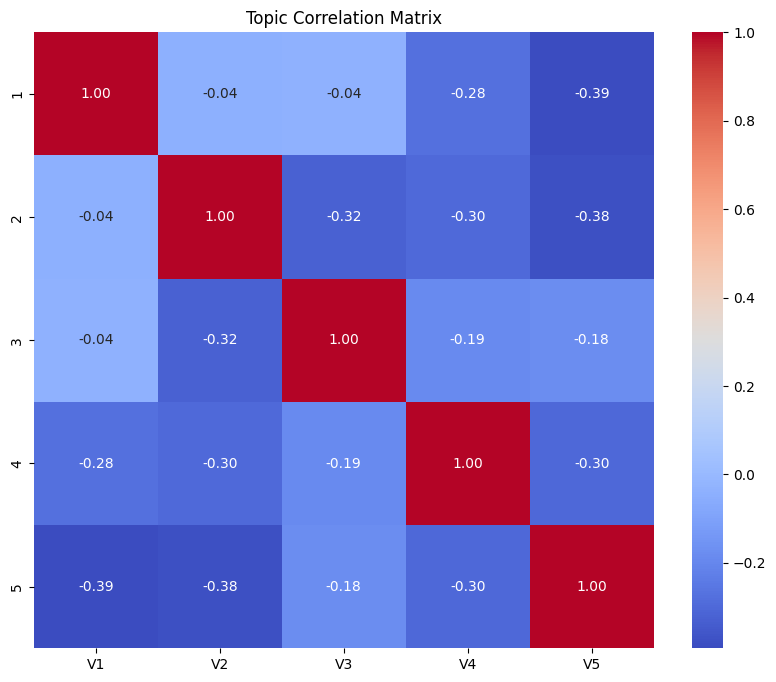

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert R DataFrame to pandas DataFrame
corr_df = pd.DataFrame(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Topic Correlation Matrix')
plt.show()


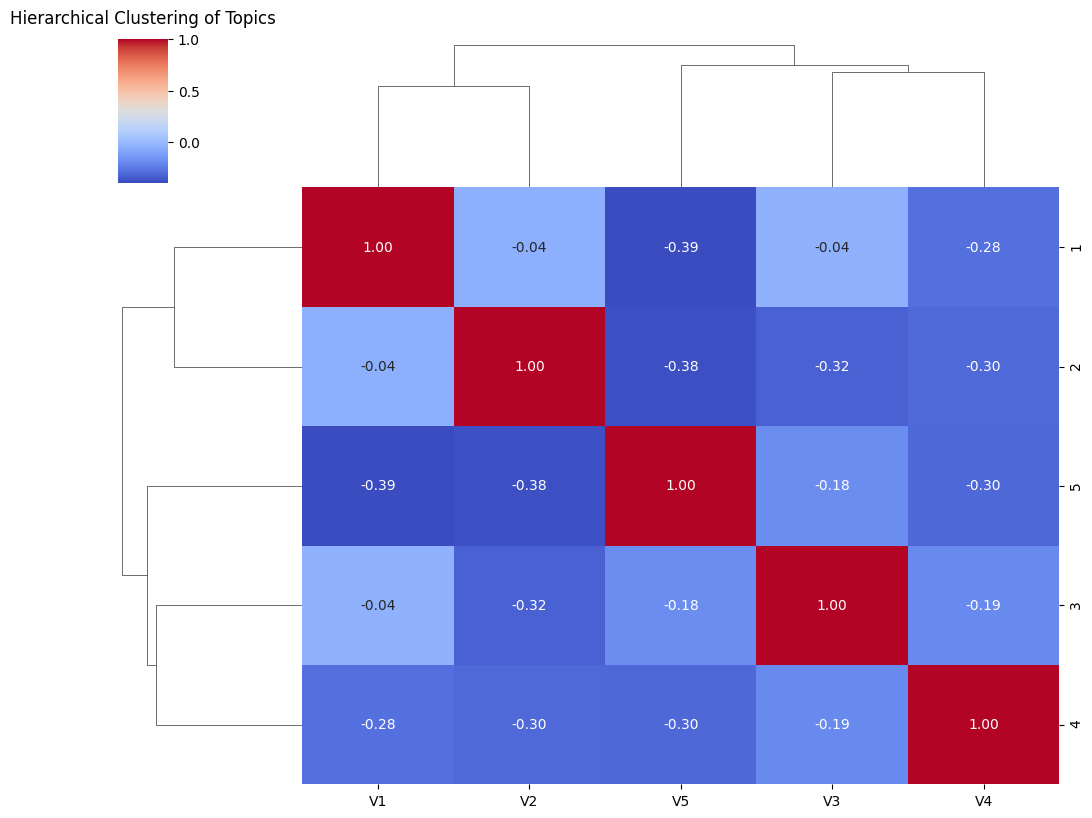

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Clustered heatmap
sns.clustermap(corr_df, cmap='coolwarm', annot=True, fmt=".2f", method='ward', figsize=(10, 8))
plt.title("Hierarchical Clustering of Topics", y=1.05)
plt.show()


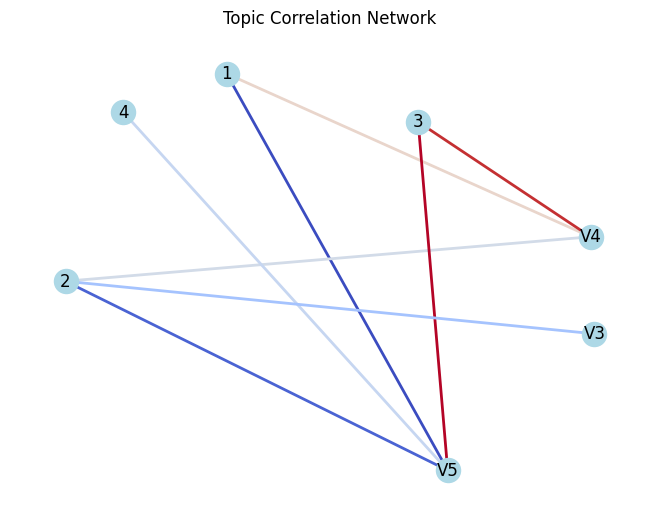

In [ ]:
import networkx as nx

# Create a graph from the correlation matrix
G = nx.Graph()

# Add nodes and edges
for i in range(corr_df.shape[0]):
    for j in range(i+1, corr_df.shape[1]):
        if abs(corr_df.iloc[i, j]) > 0.1:  # Threshold for visualization
            G.add_edge(corr_df.index[i], corr_df.columns[j], weight=corr_df.iloc[i, j])

# Draw the graph
pos = nx.spring_layout(G)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=weights, edge_cmap=plt.cm.coolwarm, width=2)
plt.title("Topic Correlation Network")
plt.show()


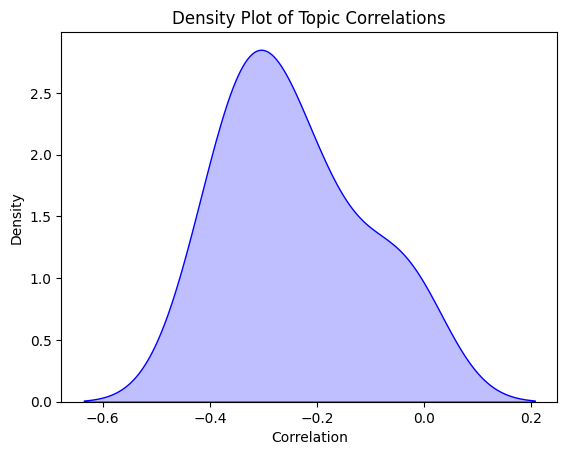

In [ ]:
import numpy as np

# Flatten the correlation matrix
corr_values = corr_df.values[np.triu_indices_from(corr_df, k=1)]

# Density plot
sns.kdeplot(corr_values, fill=True, color="blue")
plt.title("Density Plot of Topic Correlations")
plt.xlabel("Correlation")
plt.ylabel("Density")
plt.show()


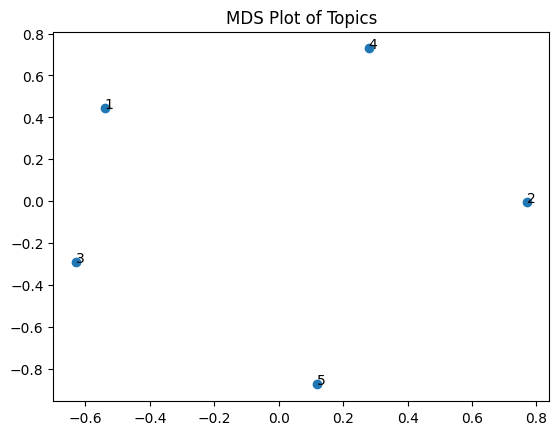

In [ ]:
from sklearn.manifold import MDS

# Perform MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coords = mds.fit_transform(1 - corr_df.values)

# Create a scatter plot
plt.scatter(mds_coords[:, 0], mds_coords[:, 1])
for i, topic in enumerate(corr_df.index):
    plt.text(mds_coords[i, 0], mds_coords[i, 1], topic)
plt.title("MDS Plot of Topics")
plt.show()
